# Brouillon

In [ ]:
f(0) = 1
f1 = f0(1 + h) = 1 × (1 + 0,5) = 1,5
f2 = f1(1+h) = 1,5 x (1+ 0,5) = 2,25
f3 = f2(1+h) = 2,25 x (1+0,5) = 3,375

In [ ]:
e^0,5 = 1,6...  
e^1 = 2,7...
e^1,5 = 4,4....



# Activité : La méthode d'Euler

In [ ]:
import numpy as np

def euler(h, n):
    t = np.zeros(n + 1)
    f = np.zeros(n + 1)
    f[0] = 1.0
    
    for i in range(n):
        t[i + 1] = t[i] + h
        f[i + 1] = f[i] * (1 + h)
    f_exact = np.exp(t)
    
    return t, f, f_exact

h = 0.5 
n = 3 
t, f_approx, f_exact = euler(h, n)


print("Résultats de la méthode d'Euler avec h =", h)
print("\nt\t\tf_approx\tf_exact\t\terreur")
print("-" * 50)
for i in range(len(t)):
    error = abs(f_exact[i] - f_approx[i])
    print(f"{t[i]:.1f}\t\t{f_approx[i]:.4f}\t{f_exact[i]:.4f}\t{error:.4f}")

Résultats de la méthode d'Euler avec h = 0.5

t		f_approx	f_exact		erreur
--------------------------------------------------
0.0		1.0000	1.0000	0.0000
0.5		1.5000	1.6487	0.1487
1.0		2.2500	2.7183	0.4683
1.5		3.3750	4.4817	1.1067


Tableau comparatif pour différentes valeurs de h:
----------------------------------------------------------------------
h	t		f_approx	f_exact		erreur		MSE
----------------------------------------------------------------------
0.5	0.0		1.0000	1.0000	0.0000	1.375806
	0.5		1.5000	1.6487	0.1487
	1.0		2.2500	2.7183	0.4683
	1.5		3.3750	4.4817	1.1067
	2.0		5.0625	7.3891	2.3266
----------------------------------------------------------------------
0.1	0.0		1.0000	1.0000	0.0000	0.076698
	0.1		1.1000	1.1052	0.0052
	0.2		1.2100	1.2214	0.0114
	0.3		1.3310	1.3499	0.0189
	0.4		1.4641	1.4918	0.0277
	0.5		1.6105	1.6487	0.0382
	0.6		1.7716	1.8221	0.0506
	0.7		1.9487	2.0138	0.0650
	0.8		2.1436	2.2255	0.0820
	0.9		2.3579	2.4596	0.1017
	1.0		2.5937	2.7183	0.1245
	1.1		2.8531	3.0042	0.1510
	1.2		3.1384	3.3201	0.1817
	1.3		3.4523	3.6693	0.2170
	1.4		3.7975	4.0552	0.2577
	1.5		4.1772	4.4817	0.3044
	1.6		4.5950	4.9530	0.3581
	1.7		5.0545	5.4739	0.4195
	1.8		5.5599	6.0496	0.4897
	1.9		6.1159	6.6859	0.5700
	2.

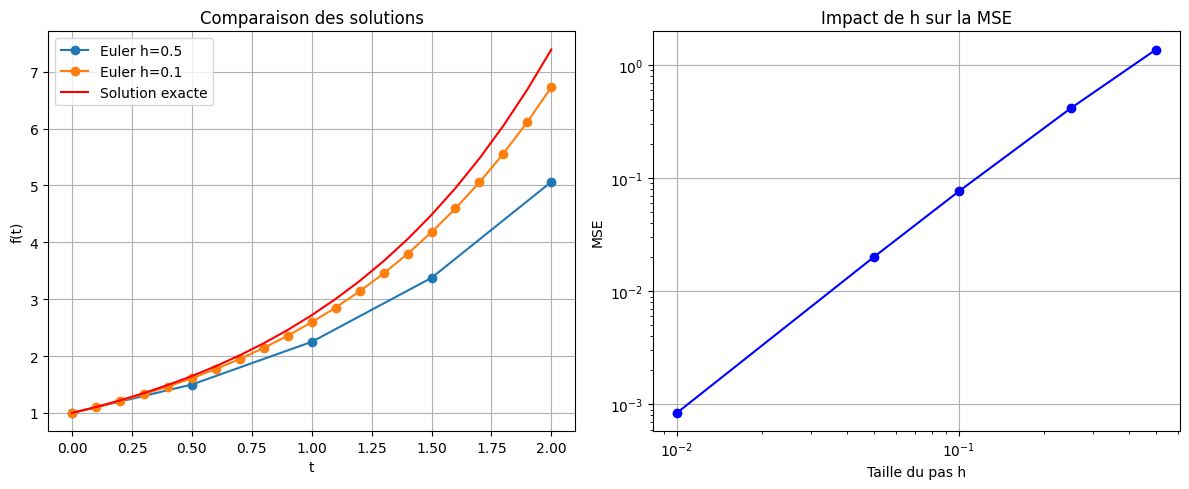


Analyse de l'impact de la taille du pas sur la MSE:
----------------------------------------
h		MSE
----------------------------------------
0.500		1.375806
0.250		0.418096
0.100		0.076698
0.050		0.020158
0.010		0.000841


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euler(h, n):
    t = np.zeros(n + 1)
    f = np.zeros(n + 1)
    f[0] = 1.0
    
    for i in range(n):
        t[i + 1] = t[i] + h
        f[i + 1] = f[i] * (1 + h)
    f_exact = np.exp(t)
    
    return t, f, f_exact

def calculate_mse(f_approx, f_exact):
    squared_errors = (f_approx - f_exact)**2
    mse = np.mean(squared_errors)
    return mse

# Comparaison pour deux valeurs de h
h_values = [0.5, 0.1]
t_final = 2.0

print("Tableau comparatif pour différentes valeurs de h:")
print("-" * 70)
print("h\tt\t\tf_approx\tf_exact\t\terreur\t\tMSE")
print("-" * 70)

for h in h_values:
    n = int(t_final/h)
    t, f_approx, f_exact = euler(h, n)
    mse = calculate_mse(f_approx, f_exact)
    
  
    for i in range(len(t)):
        error = abs(f_exact[i] - f_approx[i])
        if i == 0:
            print(f"{h:.1f}\t{t[i]:.1f}\t\t{f_approx[i]:.4f}\t{f_exact[i]:.4f}\t{error:.4f}\t{mse:.6f}")
        else:
            print(f"\t{t[i]:.1f}\t\t{f_approx[i]:.4f}\t{f_exact[i]:.4f}\t{error:.4f}")
    print("-" * 70)

plt.figure(figsize=(12, 5))

# Graphique 1: Solutions pour différentes valeurs de h
plt.subplot(1, 2, 1)
for h in h_values:
    n = int(t_final/h)
    t, f_approx, f_exact = euler(h, n)
    plt.plot(t, f_approx, 'o-', label=f'Euler h={h}')
plt.plot(t, f_exact, 'r-', label='Solution exacte')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Comparaison des solutions')
plt.legend()
plt.grid(True)

# Graphique 2: Impact du pas h sur la MSE
plt.subplot(1, 2, 2)
h_range = np.array([0.5, 0.25, 0.1, 0.05, 0.01])
mse_values = []
for h in h_range:
    n = int(t_final/h)
    t, f_approx, f_exact = euler(h, n)
    mse = calculate_mse(f_approx, f_exact)
    mse_values.append(mse)

plt.plot(h_range, mse_values, 'bo-')
plt.xlabel('Taille du pas h')
plt.ylabel('MSE')
plt.title('Impact de h sur la MSE')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

# Analyse de l'impact de h sur la MSE
print("\nAnalyse de l'impact de la taille du pas sur la MSE:")
print("-" * 40)
print("h\t\tMSE")
print("-" * 40)
for h, mse in zip(h_range, mse_values):
    print(f"{h:.3f}\t\t{mse:.6f}")